## Loading Data

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Lenovo\Desktop\Airbnb_Price_Analysis\data\NYC-Airbnb-2023-Cleaned.csv')

In [98]:
## Top five rows of the dataset

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21 00:00:00,0.30,3,314,1
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02 00:00:00,0.30,2,365,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21 00:00:00,0.72,1,0,0
3,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10 00:00:00,0.03,1,181,1
4,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295,4,45,2022-10-03 00:00:00,0.27,1,1,4


In [99]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

#### As you can see our data is cleaned.

## EDA on the dataset

## Price Analysis

In [100]:
data[['room_type', 'price']].groupby(['room_type']).mean().sort_values(by='price', ascending=False)

,price
room_type,
Hotel room,229.811321
Entire home/apt,182.938155
Private room,74.058566
Shared room,61.818913


Text(0.5, 0, 'Ratings')

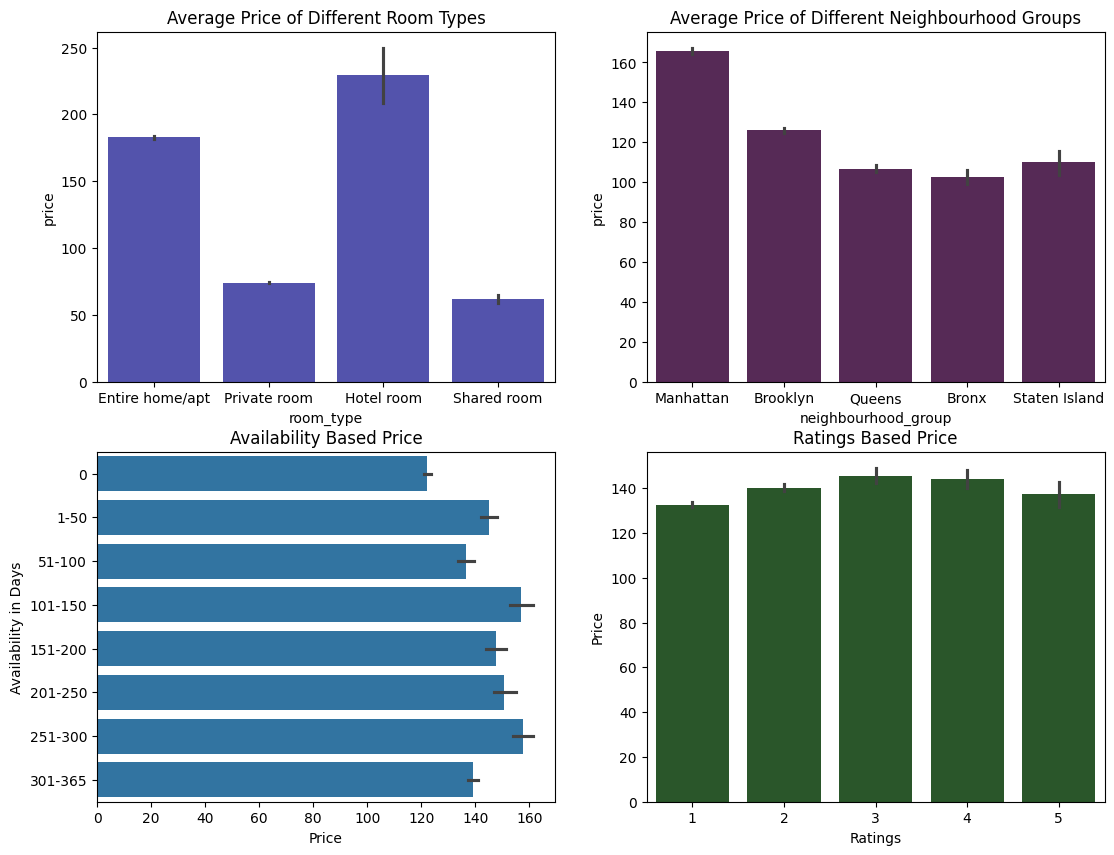

In [122]:
plt.figure(figsize=(13, 10))

plt.subplot(2, 2, 1)
sns.barplot(x='room_type', y='price', data=data, color='blue', saturation=0.35)
plt.title('Average Price of Different Room Types')

plt.subplot(2, 2, 2)
sns.barplot(x='neighbourhood_group', y='price', data=data, estimator=np.mean, color='purple', saturation=0.35)
plt.title('Average Price of Different Neighbourhood Groups')

plt.subplot(2, 2, 3)
availability = pd.cut(data['availability_365'], bins=[-1, 0, 50, 100, 150, 200, 250, 300, 365], labels=['0', '1-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-365'])
sns.barplot(y=availability, x=data['price'])
plt.title('Availability Based Price')
plt.ylabel('Availability in Days')
plt.xlabel('Price')

plt.subplot(2, 2, 4)
ratings = pd.cut(data['reviews_per_month'], bins=[0, 1, 2, 3, 4, 5], labels=['1', '2', '3', '4', '5'])
sns.barplot(x=ratings, y=data['price'], color='green', saturation=0.35)
plt.title('Ratings Based Price')
plt.ylabel('Price')
plt.xlabel('Ratings')

## Insights:

- **Room Vs Price** : Accoring to the above chart `Hotel Rooms` are most expensive then other room types and on the other hand `Shared Room` are cheapest one.

- **Neighbourhood vs Price** : As seen to the above chart `Manhattan` has the highest price listings.

- **Availability vs Price** : So rooms which are available for `100 to 300 days` in a year are priced higher

- **Reviews vs Price** : Accoring to the *above chart*, `high rating` listing and `low rating` listing are not the main factors or price for a listing.

## Location: Airbnb Listing Distribution By Location

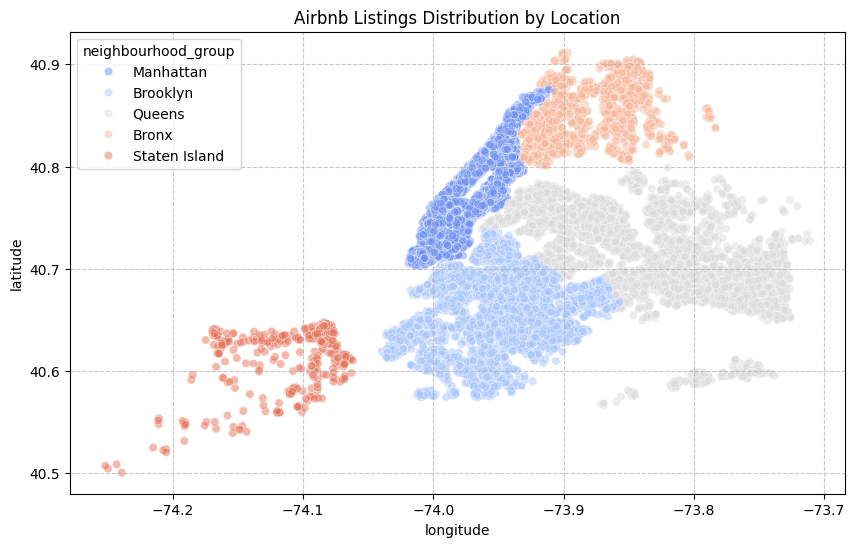

In [103]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5, palette='coolwarm')
plt.title('Airbnb Listings Distribution by Location')
plt.grid(linestyle='--', alpha=0.7, zorder=1)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7556\4091793854.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




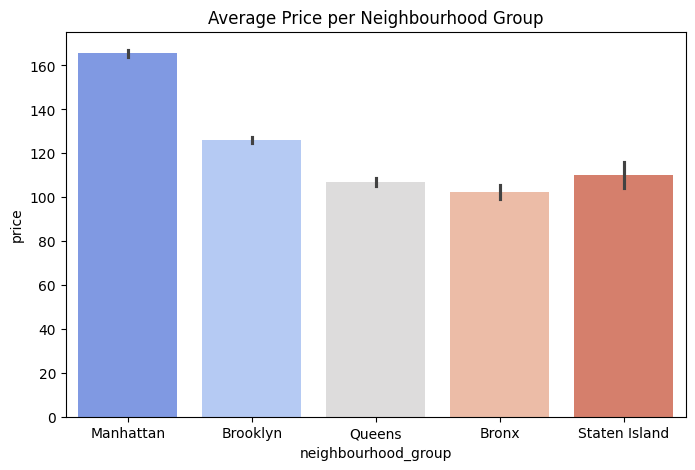

In [105]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='neighbourhood_group', y='price', estimator=np.mean, palette='coolwarm')
plt.title('Average Price per Neighbourhood Group')
plt.show()

### So most expensive neighbourhood is `Manhattan`

Text(0.5, 1.0, 'Top 10 Most Cheap Neighbourhoods')

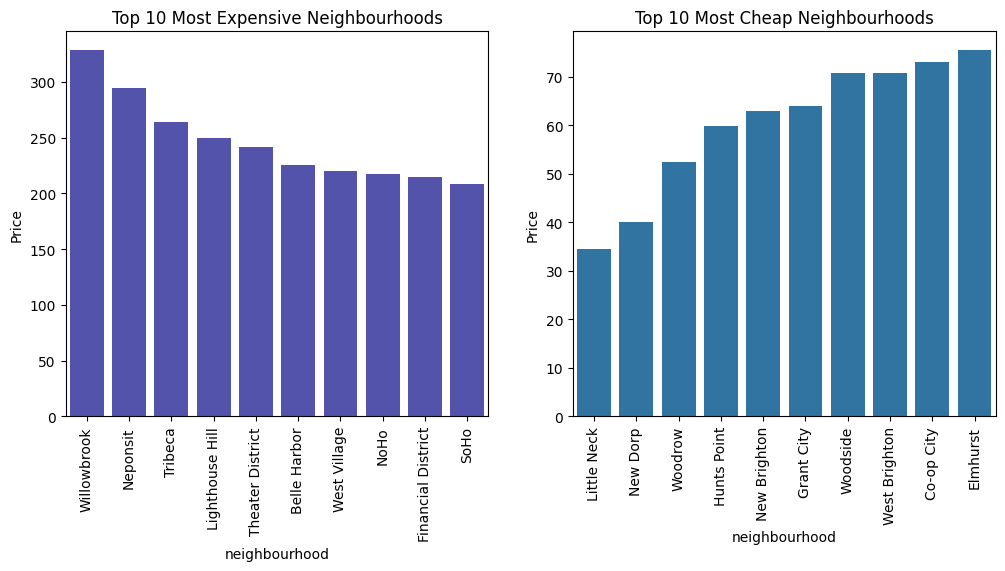

In [131]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
top_expensive_neigh = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(y=top_expensive_neigh.values, x=top_expensive_neigh.index, color='blue', saturation=0.35)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Top 10 Most Expensive Neighbourhoods')

plt.subplot(1,2,2)
top_cheap_neigh = data.groupby('neighbourhood')['price'].mean().sort_values(ascending=True).head(10)
sns.barplot(y=top_cheap_neigh.values, x=top_cheap_neigh.index)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.title('Top 10 Most Cheap Neighbourhoods')

## Listing Distribution

In [107]:
import folium
from folium.plugins import HeatMap, Draw

map_ = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=11)

folium.plugins.Fullscreen(
    position="topright",
    title="Expand",
    title_cancel="Exit",
    force_separate_button=True,
).add_to(map_)

heat_data = data[['latitude', 'longitude', 'price']].values.tolist()
HeatMap(heat_data, radius=10).add_to(map_)
Draw(export=True).add_to(map_)
map_

In [193]:
temp_data = data[['host_id', 'name']].groupby('host_id').count().sort_values(by='name', ascending=False).head(10)
print("Top 10 Hosts with Most Listings")
temp_data

Top 10 Hosts with Most Listings


,name
host_id,
107434423,474
3223938,394
305240193,222
19303369,207
200239515,192
204704622,178
162280872,156
51501835,131
61391963,124


In [196]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_from_center
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21 00:00:00,0.30,3,314,1,0.051283
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02 00:00:00,0.30,2,365,0,0.044604
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21 00:00:00,0.72,1,0,0,0.080448
3,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10 00:00:00,0.03,1,181,1,0.084114
4,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295,4,45,2022-10-03 00:00:00,0.27,1,1,4,0.038744
